# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
# Set environment variables from the .env file
env_abs_path = 'C:/Users/danie/.env'    # System specific absolute path for .env
load_dotenv(dotenv_path=env_abs_path)

True

In [4]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SECRET")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

#test for environment variable values (don't display API keys)
type(PLAID_CLIENT_ID), type(PLAID_SECRET), type(PLAID_PUBLIC_KEY)

(str, str, str)

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
# Create the client object
plaid_client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

In [6]:
# Set the institution id
INSTITUTION_ID = "ins_109508"
plaid_client.Institutions.get(1)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112060',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Bank (Broadus, MT) - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': []}],
 'request_id': 'vm4lYw5heo6swde',
 'total': 11380}

### 2. Generate a public token

In [7]:
# Create the public token
plaid_public_tkn = plaid_client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

# Print the public token
print(plaid_public_tkn)

{'public_token': 'public-sandbox-33949620-0994-484b-820b-8c67fc343e07', 'request_id': 'cA066Jj2iyQhw8H'}


### 3. Exchange the public token for an access token

In [8]:
# Retrieve the access token
plaid_exchange_tkn = plaid_client.Item.public_token.exchange(plaid_public_tkn['public_token'])

# Print the access toke
print(plaid_exchange_tkn)

{'access_token': 'access-sandbox-75deb667-243b-46fb-bb2a-27ca5393c362', 'item_id': 'X48kGPgq16Hy17GBrMrdhvmBB8lg9wudvxy6e', 'request_id': 'qBcmkLh0AozdICP'}


In [9]:
# Store the access token in a Python variable
plaid_access_tkn = plaid_exchange_tkn['access_token']
plaid_access_tkn

'access-sandbox-75deb667-243b-46fb-bb2a-27ca5393c362'

### 4. Fetch Accounts

In [10]:
# Retrieve accounts
accounts = plaid_client.Accounts.get(plaid_access_tkn)

# Print accounts
pretty_print_response(accounts)

{
    "accounts": [
        {
            "account_id": "qKRnDwbWXMIk1ovdVxV4HEJ4wDqRkvTdyLpmv",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "Kbngdk4Ga6sJ4qVMlylLI6PKwLWJ9luVDKdZg",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [11]:
# Set the start and end date 90 days from today
start = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days
plaid_transactions = plaid_client.Transactions.get(plaid_access_tkn,start,end)

# Print the transactions
pretty_print_response(plaid_transactions['transactions'])


[
    {
        "account_id": "Kbngdk4Ga6sJ4qVMlylLI6PKwLWJ9luVDKdZg",
        "account_owner": null,
        "amount": 25,
        "authorized_date": null,
        "category": [
            "Payment",
            "Credit Card"
        ],
        "category_id": "16001000",
        "date": "2020-07-14",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": null,
        "name": "CREDIT CARD 3333 PAYMENT *//",
        "payment_channel": "other",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
   

### 2. Print the categories for each transaction

In [12]:
# Create a for-loop to print the categories for each transaction
# create a transaction list from the plaid_transactions
transactions = plaid_transactions['transactions']

#iterate through each transaction
for transaction in transactions:
    # set categories to 'category' from each transaction 
    categories = transaction['category']

    # print categories list from each transaction
    print(categories)


['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [13]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
# define column names
column_names = ['date','name','amount','category']
transaction_data = pd.DataFrame(columns=column_names)


# Retrieve all the transactions
start = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-180))
end = '{:%Y-%m-%d}'.format(datetime.datetime.now())
plaid_response = plaid_client.Transactions.get(plaid_access_tkn,start,end)

# create a list of transactions from the plaid_response dictionary
all_transactions_list = plaid_response['transactions']

# set total_transactions_count to evaluation against in while loop, next
total_transactions_count = plaid_response['total_transactions']

# while loop to get "All" transactions
# From Plaid-python documentation: '''the transactions in the response are paginated, so make multiple calls while increasing the offset to
# From Plaid-python documentation:  transactions'''
while len(all_transactions_list) < total_transactions_count:
    # get next response data based on offset of all_transactions_list length
    loop_response = plaid_client.Transactions.get(plaid_access_tkn,start,end,
                                       offset=len(all_transactions_list)
                                      )
    # add latest loop_resposnse transactions list to all_transactions_list
    all_transactions_list.extend(loop_response['transactions'])


# Populate the transactions DataFrame with the transactions data
transaction_data = pd.DataFrame(all_transactions_list)[column_names].copy()

# re-set category list values from the first category list item
transaction_data['category'] = transaction_data['category'].str[0]


# Display sample data from the DataFrame    
transaction_data

,date,name,amount,category
0,2020-07-14,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
1,2020-07-14,Uber 063015 SF**POOL**,5.40,Travel
2,2020-07-13,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
3,2020-07-13,CD DEPOSIT .INITIAL.,1000.00,Transfer
4,2020-07-12,Touchstone Climbing,78.50,Recreation
...,...,...,...,...
91,2020-01-29,Uber 072515 SF**POOL**,6.33,Travel
92,2020-01-26,Tectra Inc,500.00,Food and Drink
93,2020-01-25,AUTOMATIC PAYMENT - THANK,2078.50,Payment
94,2020-01-25,KFC,500.00,Food and Drink


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [14]:
# Display data types
transaction_data.dtypes

date         object
name         object
amount      float64
category     object
dtype: object

In [15]:
# Make any required data type transformation
transaction_data['date'] = pd.to_datetime(transaction_data['date'])
transaction_data['name'] = transaction_data['name'].astype(str)
transaction_data['amount'] = pd.to_numeric(transaction_data['amount'])
transaction_data['category'] =transaction_data['category'].astype(str)
transaction_data.head()

,date,name,amount,category
0,2020-07-14,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
1,2020-07-14,Uber 063015 SF**POOL**,5.4,Travel
2,2020-07-13,ACH Electronic CreditGUSTO PAY 123456,5850.0,Transfer
3,2020-07-13,CD DEPOSIT .INITIAL.,1000.0,Transfer
4,2020-07-12,Touchstone Climbing,78.5,Recreation


In [16]:
# Set the date column as index
transaction_data.set_index('date', drop=True, inplace=True)
transaction_data.sort_index(ascending=True,inplace=True)

# Display sample data
transaction_data.head(15)

,name,amount,category
date,,,
2020-01-25,Madison Bicycle Shop,500.00,Shops
2020-01-25,KFC,500.00,Food and Drink
2020-01-25,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-01-26,Tectra Inc,500.00,Food and Drink
2020-01-29,Uber 072515 SF**POOL**,6.33,Travel
2020-01-31,United Airlines,500.00,Travel
2020-02-10,INTRST PYMNT,-4.22,Transfer
2020-02-11,SparkFun,89.40,Food and Drink
2020-02-12,Starbucks,4.33,Food and Drink


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [17]:
# Fetch de income data
start = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-180))
end = '{:%Y-%m-%d}'.format(datetime.datetime.now())

plaid_income_response = plaid_client.Income.get(plaid_access_tkn)

# Print the income data
pretty_print_response(plaid_income_response)

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 720,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6500,
        "last_year_income_before_tax": 7893,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "2JbqDifyYC1Kh8K"
}


In [18]:
# Determine the previous year's gross income and print the results
last_year_gross_income = plaid_income_response['income']['last_year_income_before_tax']
last_year_gross_income

7893

In [19]:
# Determine the current monthly income and print the results
current_monthly_income = plaid_income_response['income']['income_streams'][0]['monthly_income']
current_monthly_income

500

In [20]:
# Determine the projected yearly income and print the results
projected_yearly_gross_income = plaid_income_response['income']['projected_yearly_income_before_tax'] 
projected_yearly_gross_income

7389

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [21]:
# Compute the total expenses per category
total_expense_per_cat = transaction_data.groupby(transaction_data['category']).sum()

# Display the expenses per category

total_expense_per_cat

,amount
category,
Food and Drink,6634.38
Payment,12621.00
Recreation,471.00
Shops,3000.00
Transfer,41074.68
Travel,70.38


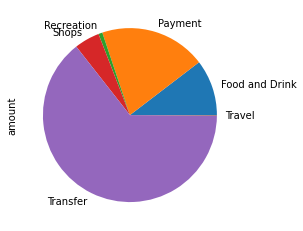

In [22]:
# Create a spending categories pie chart.
total_expense_per_cat.plot(kind='pie',y='amount',legend=False)

### Calculate the expenses per month

In [23]:
# Create a DataFrame with the total expenses
total_expenses = pd.DataFrame(transaction_data['amount'])

# Display sample data
total_expenses.head()

,amount
date,
2020-01-25,500.00
2020-01-25,500.00
2020-01-25,2078.50
2020-01-26,500.00
2020-01-29,6.33


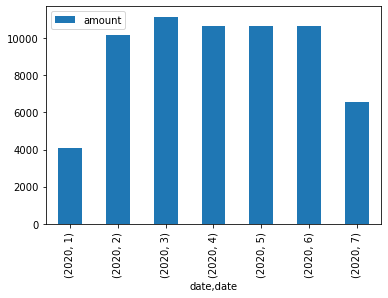

In [24]:
# Create a spending per month bar chart
total_expenses.groupby([total_expenses.index.year,total_expenses.index.month]).sum().plot(kind='bar')
